In [387]:
import numpy as np
import pandas as pd

df = pd.read_csv("/Users/user/Documents/Bewerbung RLI/Aufgabe/2023-03-15 Data Bewerbungsaufgabe.csv", #csv datei als DataFrame speichern
                             sep=";",
                             header=0,
                             names=["1", "Energiequelle", "Leistung in kW"]) #Spalten benennen


del df['1']  #erste Spalte löschen

df


,Energiequelle,Leistung in kW
0,wind,850
1,wind,850
2,wind,850
3,wind,850
4,wind,850
...,...,...
5102,wind,1.65
5103,wind,850
5104,wind,1.65
5105,wind,850


In [388]:
df_sorted = df.sort_values('Energiequelle')  #sortieren Energiequellen alphabetisch
print(df_sorted)


     Energiequelle Leistung in kW
4652        biogas            yes
3022        biogas            NaN
3021        biogas            NaN
3020        biogas            NaN
3018        biogas            NaN
...            ...            ...
2994           NaN            NaN
2995           NaN            NaN
3334           NaN            NaN
3529           NaN            NaN
4549           NaN            NaN

[5107 rows x 2 columns]


In [392]:
for i in range(len(df)):  #Angewandt auf alles Zeilen des Dataframe
    df_sorted.loc[df['Leistung in kW']=='yes','Leistung in kW']=600 #wenn 'Leistung in kW' == yes, ändern in 600


print(df_sorted)

     Energiequelle Leistung in kW
4652        biogas            600
3022        biogas            NaN
3021        biogas            NaN
3020        biogas            NaN
3018        biogas            NaN
...            ...            ...
2994           NaN            NaN
2995           NaN            NaN
3334           NaN            NaN
3529           NaN            NaN
4549           NaN            NaN

[5107 rows x 2 columns]


In [393]:
df_NaN = df_sorted.dropna(subset=['Leistung in kW'])  #Alle Zeilen mit NaN in 'Leistung in kW' löschen

print(df_NaN)

df_number = df_NaN[df_NaN['Leistung in kW'].apply(lambda x: isinstance(x, str))] #wenn Eintrag in Spalte 'Leistung in kW' ein String ist, Zeile löschen

 
print(df_number)        




     Energiequelle Leistung in kW
4652        biogas            600
2432        biogas            250
2427        biogas            901
2424        biogas            889
2407        biogas            330
...            ...            ...
1915          wind           3200
1914          wind           3200
1912          wind           3200
1913          wind           3200
5106          wind            850

[2765 rows x 2 columns]
     Energiequelle Leistung in kW
2432        biogas            250
2427        biogas            901
2424        biogas            889
2407        biogas            330
2404        biogas            250
...            ...            ...
1915          wind           3200
1914          wind           3200
1912          wind           3200
1913          wind           3200
5106          wind            850

[2156 rows x 2 columns]


In [394]:

quelle_list = ['biogas','biomass','coal','gas','hydro','nuclear','wind'] #Liste mit Energiequellen
for quelle in quelle_list:
    df_quelle = df_number[df_number['Energiequelle']=='quelle']  #Für jeden Energiequelle ein eigenes DataFrame erstellen

df_gas

,Energiequelle,Leistung in kW
207,gas,1
194,gas,10
195,gas,2
196,gas,2
220,gas,2
223,gas,2
237,gas,2
198,gas,420
185,gas,440
187,gas,440


    Energiequelle Leistung in kW
207           gas              1
194           gas             10
195           gas              2
196           gas              2
220           gas              2
223           gas              2
237           gas              2
198           gas            420
185           gas            440
187           gas            440
188           gas            440
230           gas            800


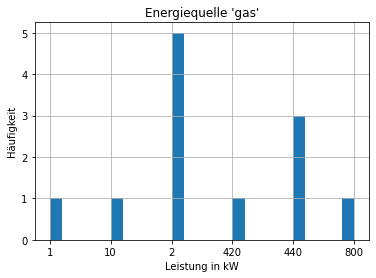

In [397]:
import matplotlib as plt

df_gas_sorted = df_gas.sort_values('Leistung in kW')  #DataFrame 'gas' sortieren nach Leistung in kW'
print(df_gas_sorted)

hist = df_gas_sorted['Leistung in kW'].hist(bins = 25)   #Als Histogramm plotten mit 'Leistnug in kW' in Abhängigkeit von der Häufigkeit
hist.set_ylabel('Häufigkeit')
hist.set_xlabel('Leistung in kW')
hist.set_title("Energiequelle 'gas'")
hist.figure.savefig("/Users/user/Documents/Bewerbung RLI/Aufgabe/Häufigkeit der Energiequelle gas.png") #Plot als png-Datei speichern